In [533]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


In [534]:


number_of_points = 10000
domain_start = 0
domain_end = 100

time = np.linspace(domain_start, domain_end, number_of_points)


freq = 4
om = freq * 2 * np.pi

poly_speed = np.polyfit(np.linspace(domain_start, domain_end, 6), [0.5, 0.5, 0.5, 0.5, 0.5, 0.5], deg=0)
poly_turn = np.polyint(poly_speed, k=2)
poly_acceleration = np.polyder(poly_speed)


smooth_speed = np.polyval(poly_speed, time)
smooth_turn = np.mod(np.polyval(poly_turn, time), 2*np.pi)
smooth_accelrateion = np.polyval(poly_acceleration, time)



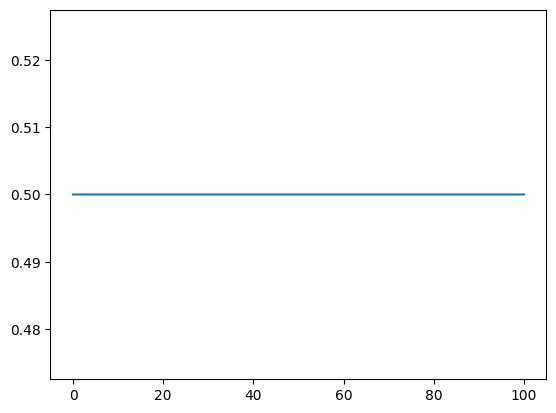

In [535]:
plt.plot(time, smooth_speed)

In [536]:
a = 2
b = 0.5
c = -0.2
d = 2
e = -0.3

ripples = (a + b * np.exp(c * smooth_speed)) * np.sin(om * smooth_turn + d + e*smooth_speed)

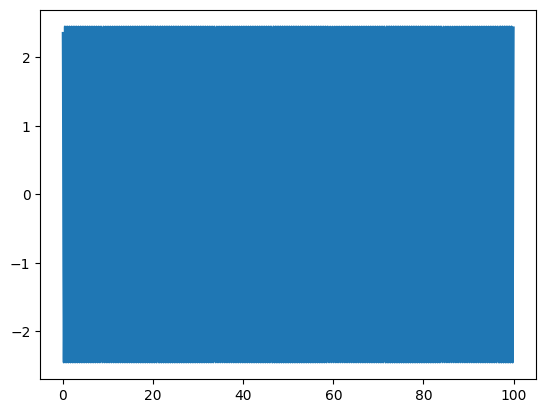

In [537]:
plt.plot(time, ripples)

In [538]:
sp.integrate.simpson( y=ripples, x=time)

0.8790049497819681

In [539]:
P = domain_end - domain_start
A0 = 1/(domain_end - domain_start) * sp.integrate.simpson(x=time, y=ripples)

A0

0.00879004949781968

In [540]:

A1 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.cos(2*np.pi * 1/P * time))
B1 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.sin(2*np.pi * 1/P * time))
A1, B1

(-0.001396886119139374, -1.5140743890692454e-05)

In [541]:
A2 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.cos(2*np.pi * 2/P * time))
B2 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.sin(2*np.pi * 2/P * time))
A2, B2

(-0.0011529925748531315, 8.67778794450974e-05)

In [542]:
A3 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.cos(2*np.pi * 3/P * time))
B3 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.sin(2*np.pi * 3/P * time))
A3, B3

(-0.001373520960733012, 4.470086166038793e-05)

In [543]:
A4 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.cos(2*np.pi * 4/P * time))
B4 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.sin(2*np.pi * 4/P * time))
A4, B4

(-0.0016756698884201422, 0.0005080296563071789)

In [544]:
A5 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.cos(2*np.pi * 5/P * time))
B5 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.sin(2*np.pi * 5/P * time))
A5, B5

(-0.0013462943218222046, 0.0001625820449447615)

In [545]:
A6 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.cos(2*np.pi * 6/P * time))
B6 = 2/P * sp.integrate.simpson(x=time, y=ripples*np.sin(2*np.pi * 6/P * time))
A6, B6

(-0.0014277261378567263, 6.987551973452219e-05)

In [546]:
def cos_coef(x, y, n, domain_length):
    return 2/P * sp.integrate.simpson(x=x, y=y*np.cos(2*np.pi * n/domain_length * x))

def sin_coef(x, y, n, domain_length):
    return 2/P * sp.integrate.simpson(x=x, y=y*np.sin(2*np.pi * n/domain_length * x))

def fourier(x, y, domain_length, number_of_terms):
    A0 = 1/domain_length * sp.integrate.simpson(x=x, y=y)
    
    return A0 + np.sum(list(map(lambda term: cos_coef(x, y, term, domain_length) * np.cos(2*np.pi * term/domain_length * x) + 
                                    sin_coef(x, y, term, domain_length) * np.sin(2*np.pi * term/domain_length * x), range(1,number_of_terms+1))), axis=0)
    
    
def fourier_double_int(x, y, domain_length, number_of_terms):
    A0 = 1/domain_length * sp.integrate.simpson(x=x, y=y)
    
    return A0 + np.sum(list(map(lambda term: cos_coef(x, y, term, domain_length)* (domain_length/2/np.pi / term)**2 * -np.cos(2*np.pi * term/domain_length * x) + 
                                    sin_coef(x, y, term, domain_length) * (domain_length/2/np.pi / term)**2 * -np.sin(2*np.pi * term/domain_length * x), range(1,number_of_terms+1))), axis=0)

In [547]:
ripple_estimation = A0 + \
    A1 * np.cos(2*np.pi * 1/P * time) + B1 * np.sin(2*np.pi * 1/P * time) + \
    A2 * np.cos(2*np.pi * 2/P * time) + B2 * np.sin(2*np.pi * 2/P * time) + \
    A3 * np.cos(2*np.pi * 3/P * time) + B3 * np.sin(2*np.pi * 3/P * time) + \
    A4 * np.cos(2*np.pi * 4/P * time) + B4 * np.sin(2*np.pi * 4/P * time) + \
    A5 * np.cos(2*np.pi * 5/P * time) + B5 * np.sin(2*np.pi * 5/P * time) + \
    A6 * np.cos(2*np.pi * 6/P * time) + B6 * np.sin(2*np.pi * 6/P * time)

In [548]:
ripple_estimation = fourier(time, ripples, P, 30)
ripple_estimation

array([-0.04410021, -0.04381577, -0.04352729, ..., -0.04465667,
       -0.04438054, -0.04410021])

In [549]:
Iq_ripple = fourier_double_int(time, ripples, P, 200)
Iq_ripple

array([0.603927  , 0.60445365, 0.60511153, ..., 0.60328612, 0.60353692,
       0.603927  ])

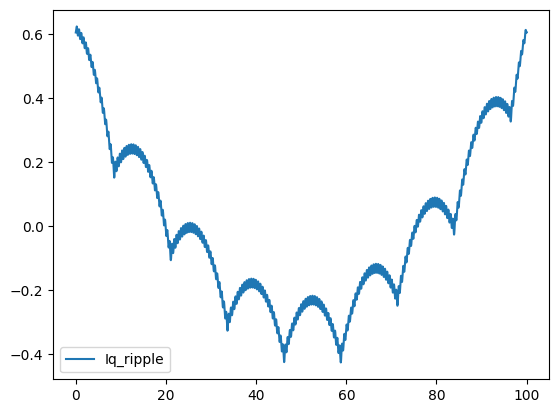

In [550]:
#plt.plot(time, ripples, label="ripples")
#plt.plot(time, ripple_estimation, label="ripple_estimation")
plt.plot(time, Iq_ripple, label="Iq_ripple")
plt.legend()